In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [16]:
df1 = pd.read_csv("./유성구_지역화폐이용_2020.csv",encoding='CP949')
df2 = pd.read_csv("./유성구_지역화폐이용_2021.csv",encoding='CP949')
df3 = pd.read_csv("./유성구_지역화폐이용_2022_03.csv",encoding='CP949')
df4 = pd.read_csv("./유성구_지역화폐이용_2022_04.csv",encoding='CP949')
df5 = pd.read_csv("./유성구_지역화폐이용_2022_05.csv",encoding='CP949')

df = pd.concat([df1,df2,df3,df4,df4], ignore_index= True)
df

,이용년,이용월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,지수_이용건수,지수_이용금액
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,I,숙박 및 음식점업(55-56),100.00,100.00
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,I,숙박 및 음식점업(55-56),100.00,100.00
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,G,도매 및 소매업(45-47),100.00,100.00
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,I,숙박 및 음식점업(55-56),100.00,100.00
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,I,숙박 및 음식점업(55-56),100.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17506,2022,4,44,충청남도,44250.0,계룡시,4425031522,엄사면,G,도매 및 소매업(45-47),180.00,11.78
17507,2022,4,44,충청남도,44250.0,계룡시,4425031522,엄사면,I,숙박 및 음식점업(55-56),1150.00,790.37
17508,2022,4,44,충청남도,44250.0,계룡시,4425033021,신도안면,G,도매 및 소매업(45-47),315.00,386.49
17509,2022,4,44,충청남도,44250.0,계룡시,4425033021,신도안면,I,숙박 및 음식점업(55-56),126.47,249.24


In [6]:
df["이용년"]=df["이용년"].astype(str)
df["이용월"]=df["이용월"].astype(str)

In [7]:
for i in range(2,3):
    df['이용월'+str(i)] = df["이용월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..


In [8]:
df["이용년월"] = df["이용년"] + df["이용월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

from datetime import datetime

df['이용년월']=df['이용년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

# https://hiio.tistory.com/30

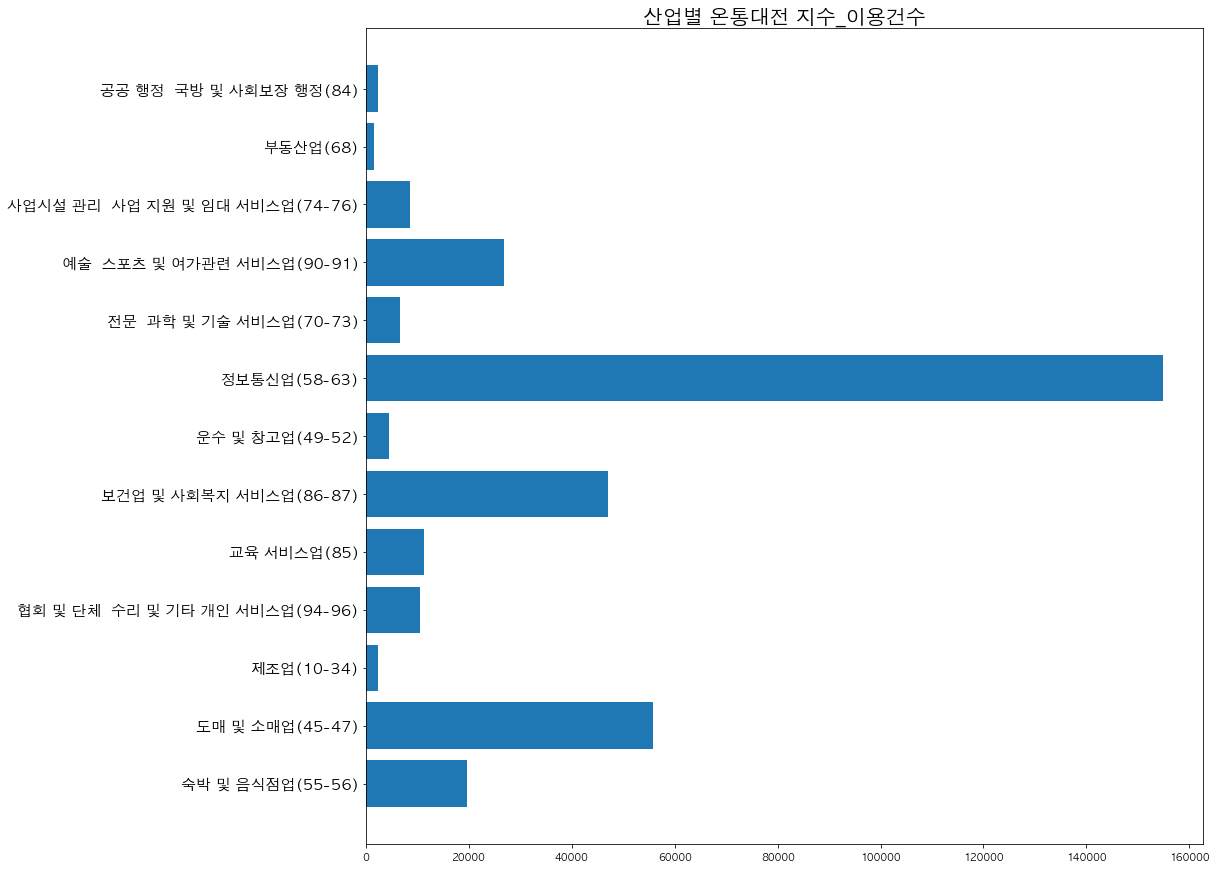

In [10]:
plt.figure(figsize=(15,15))

x= df['표준산업대분류명'].values
y =df['지수_이용건수'].values
plt.barh(x,y)

str_title="산업별 온통대전 지수_이용건수"
plt.yticks(fontsize=15)
plt.title(str_title, fontsize=20)
plt.show()

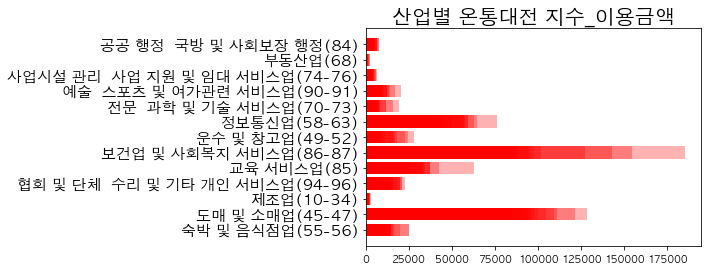

In [11]:
x2 =df['표준산업대분류명'].values
y2 =df['지수_이용금액'].values
plt.barh(x2,y2,color='red',alpha=0.3,linewidth=5)

str_title2="산업별 온통대전 지수_이용금액"
plt.yticks(fontsize=15)
plt.title(str_title2,fontsize=20)
plt.show()

Text(0.5, 0, '')

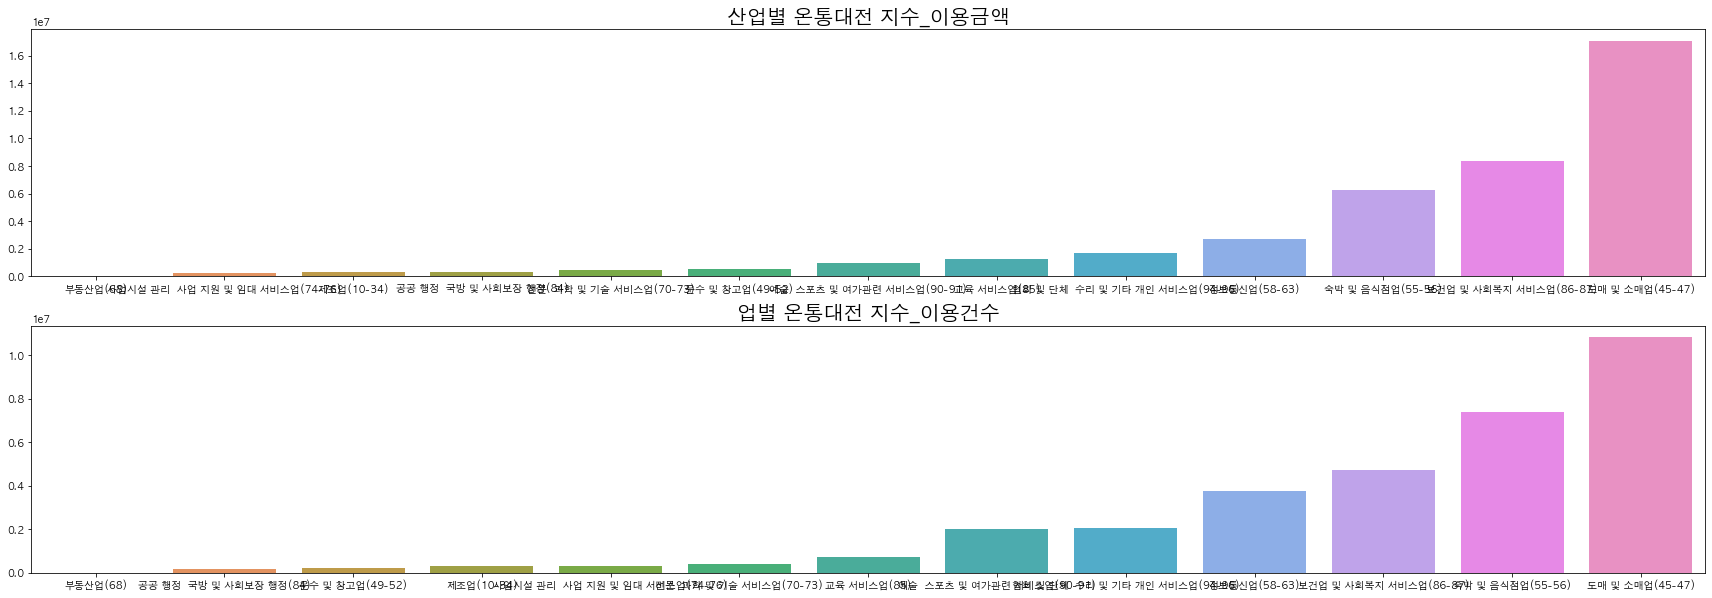

In [22]:
plt.figure(figsize=(30,10))

plt.subplot(2,1,1)
t =df.groupby(by= '표준산업대분류명').sum()['지수_이용금액'].sort_values()
g1 = sns.barplot(x=t.index,y=t.values)
g1.set_title("산업별 온통대전 지수_이용금액",fontsize=20)
g1.set_xlabel("")


plt.subplot(2,1,2)

t2 =df.groupby(by= '표준산업대분류명').sum()['지수_이용건수'].sort_values()
g2 =sns.barplot(x=t2.index,y=t2.values)
g2.set_title("업별 온통대전 지수_이용건수",fontsize=20)
g2.set_xlabel("")

# 대전의 업종별 카드이용금액

In [23]:
df.head()

,이용년,이용월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,지수_이용건수,지수_이용금액
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,I,숙박 및 음식점업(55-56),100.0,100.0
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,I,숙박 및 음식점업(55-56),100.0,100.0
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,G,도매 및 소매업(45-47),100.0,100.0
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,I,숙박 및 음식점업(55-56),100.0,100.0
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,I,숙박 및 음식점업(55-56),100.0,100.0


Text(0.5, 0, '')

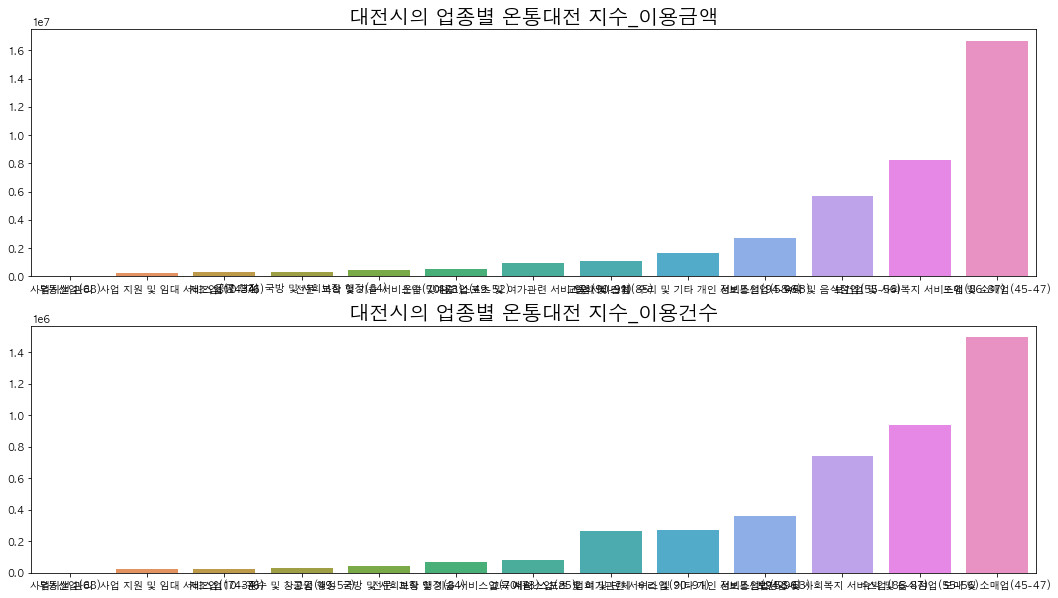

In [24]:

plt.figure(figsize=(18,10))


plt.subplot(2,1,1)
t = df[( df['광역시도명'] == '대전광역시')].groupby(by= '표준산업대분류명').sum()['지수_이용금액'].sort_values()
g =sns.barplot(x=t.index,y=t.values)
g.set_title("대전시의 업종별 온통대전 지수_이용금액",fontsize=20)
g.set_xlabel("")

plt.subplot(2,1,2)
t2 = df3[( df3['광역시도명'] == '대전광역시')].groupby(by= '표준산업대분류명').sum()['지수_이용건수'].sort_values()
g2=sns.barplot(x=t2.index,y=t2.values)
g2.set_title("대전시의 업종별 온통대전 지수_이용건수",fontsize=20)
g2.set_xlabel("")

# 대전시 지역구별 카드이용금액 과 카드이용건수 분석


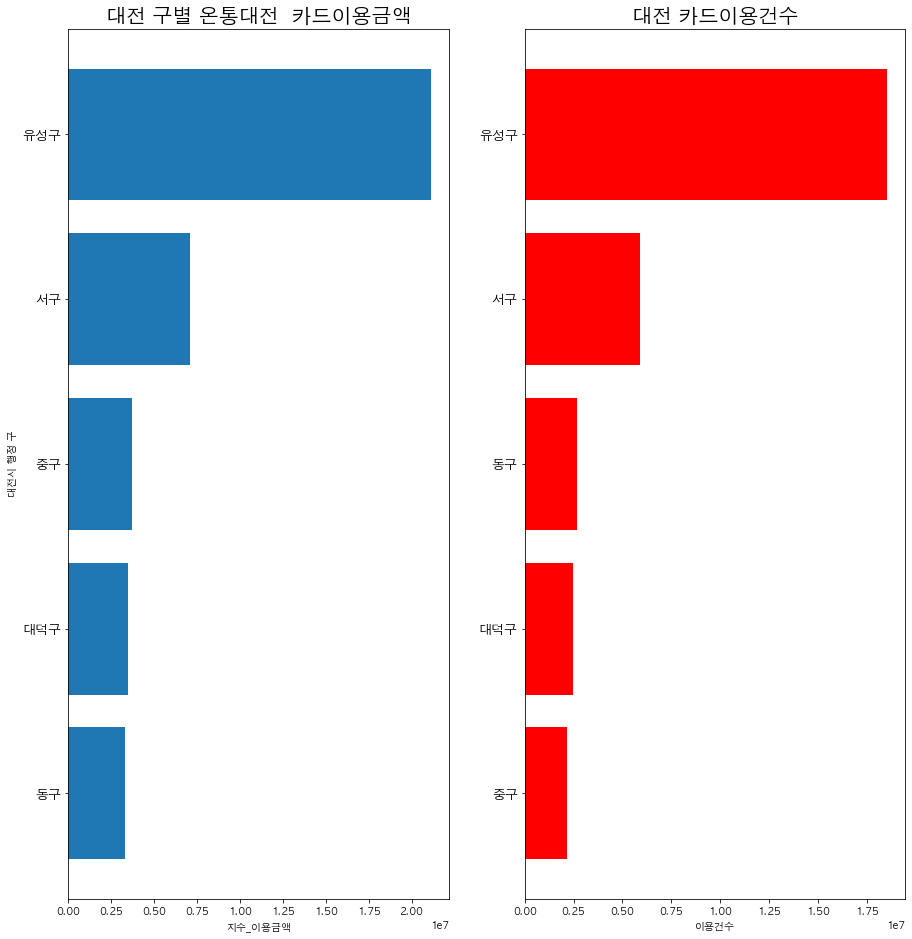

In [25]:
t = df[( df['광역시도명'] == '대전광역시')].groupby(by= '시군구명').sum()['지수_이용금액'].sort_values()

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=13)
plt.figure(figsize = (15,16))


plt.subplot(1,2,1)
plt.title('대전 구별 온통대전  카드이용금액',fontsize=20)
plt.ylabel('대전시 행정 구')
plt.xlabel('지수_이용금액')
plt.barh(t.index,t)


t2 = df[( df['광역시도명'] == '대전광역시')].groupby(by= '시군구명').sum()['지수_이용건수'].sort_values()
plt.subplot(1,2,2)
plt.title('대전 카드이용건수',fontsize=20)
# plt.ylabel('서울시 행정 구')
plt.xlabel('이용건수')
plt.barh(t2.index,t2,color='red')

plt.show()

In [28]:
df.head()

,이용년,이용월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,지수_이용건수,지수_이용금액
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,I,숙박 및 음식점업(55-56),100.0,100.0
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,I,숙박 및 음식점업(55-56),100.0,100.0
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,G,도매 및 소매업(45-47),100.0,100.0
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,I,숙박 및 음식점업(55-56),100.0,100.0
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,I,숙박 및 음식점업(55-56),100.0,100.0


In [39]:
t = df[( df['광역시도명'] == '대전광역시')]

In [50]:
t.shape

(15203, 12)

In [45]:
t['법정동명'].unique()

array(['인동', '천동', '가오동', '신흥동', '판암동', '용운동', '대동', '자양동', '가양동', '용전동',
       '성남동', '삼성동', '대성동', '선화동', '목동', '중촌동', '대흥동', '대사동', '용두동',
       '오류동', '태평동', '유천동', '문화동', '산성동', '복수동', '변동', '도마동', '정림동',
       '용문동', '탄방동', '괴정동', '가장동', '내동', '갈마동', '둔산동', '월평동', '가수원동',
       '도안동', '관저동', '만년동', '원내동', '교촌동', '대정동', '학하동', '계산동', '봉명동',
       '구암동', '덕명동', '원신흥동', '상대동', '장대동', '노은동', '지족동', '죽동', '궁동',
       '어은동', '구성동', '신성동', '가정동', '도룡동', '장동', '화암동', '덕진동', '하기동',
       '추목동', '신봉동', '수남동', '반석동', '문지동', '전민동', '원촌동', '탑립동', '용산동',
       '봉산동', '관평동', '송강동', '오정동', '송촌동', '법동', '중리동', '비래동', '석봉동',
       '목상동', '덕암동', '신탄진동', '효동', '신안동', '홍도동', '낭월동', '석교동', '호동',
       '옥계동', '부사동', '사정동', '안영동', '용계동', '복용동', '갑동', '안산동', '외삼동',
       '대화동', '읍내동', '신대동', '와동', '문평동', '신일동', '상서동', '평촌동', '문창동', '방동',
       '방현동', '자운동', '연축동', '성북동', '은행동', '원동', '중동', '대별동', '소제동', '세천동',
       '용호동', '흑석동'], dtype=object)

In [46]:
t['법정동명'].value_counts()

지족동    307
봉명동    290
관평동    288
둔산동    287
상대동    287
      ... 
소제동      4
용호동      3
대별동      1
세천동      1
흑석동      1
Name: 법정동명, Length: 122, dtype: int64

In [43]:
tt = t['법정동명']

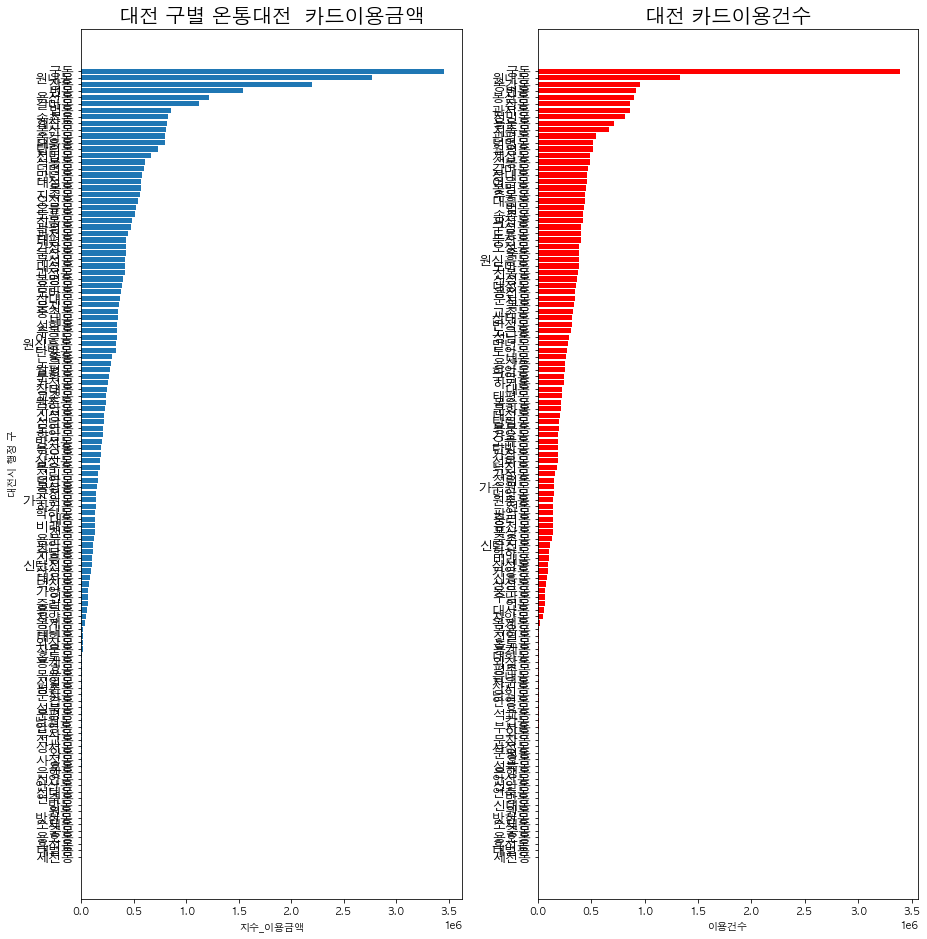

In [30]:
t = df[( df['광역시도명'] == '대전광역시')].groupby(by= '법정동명').sum()['지수_이용금액'].sort_values()

plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=13)
plt.figure(figsize = (15,16))


plt.subplot(1,2,1)
plt.title('대전 구별 온통대전  카드이용금액',fontsize=20)
plt.ylabel('대전시 행정 구')
plt.xlabel('지수_이용금액')
plt.barh(t.index,t)


t2 = df[( df['광역시도명'] == '대전광역시')].groupby(by= '법정동명').sum()['지수_이용건수'].sort_values()
plt.subplot(1,2,2)
plt.title('대전 카드이용건수',fontsize=20)
# plt.ylabel('서울시 행정 구')
plt.xlabel('이용건수')
plt.barh(t2.index,t2,color='red')

plt.show()

In [31]:
t.value_counts()

100.00        3
300.00        1
415306.20     1
396416.32     1
388323.06     1
             ..
46175.55      1
34371.09      1
15067.85      1
13674.02      1
3452093.06    1
Name: 지수_이용금액, Length: 120, dtype: int64